In [1]:
from qiskit.quantum_info import Statevector,concurrence,DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

In [2]:
def random_statevector_given_fidelity(dims, lbound,ubound, seed=None):
    """Generator a random Statevector.

    The statevector is sampled from the uniform (Haar) measure.

    Args:
        dims (int or tuple): the dimensions of the state.
        seed (int or np.random.Generator): Optional. Set a fixed seed or
                                           generator for RNG.

    Returns:
        Statevector: the random statevector.
    """
    if seed is None:
        rng = np.random.default_rng()
    elif isinstance(seed, np.random.Generator):
        rng = seed
    else:
        rng = default_rng(seed)

    dim = np.product(dims)

    # Random array over interval (0, 1]
    x = rng.random(dim)
    x += x == 0
    x = -np.log(x)

    sumx = sum(x)
    phases = rng.random(dim) * 2.0 * np.pi

    y = x / sumx

    rnd = np.random.uniform(low=np.sqrt(lbound), high=np.sqrt(ubound))

    k = (y[3] + rnd*(y[1] + y[2] + y[3]))/(1-rnd)

    sumy = sum(y)

    
    y[0] = k

    z = y / sum(y)

    return Statevector(np.sqrt(z) * np.exp(1j * phases), dims=dims)

def check_arccos(x):
    '''Ensure I'm getting real values for my arccos'''
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    return -1 <= -s*(1-s)/(4*p) <= 0

def random_statevector2_given_fidelity(dim,lbound,ubound,conc):
    '''generate a random state vector with a given fidelity and concurrence'''
    r = True
    while r:
        x = random_statevector_given_fidelity(dim,lbound,ubound)
        r = not (check_conc(x,conc) and check_arccos(x))
    return x

def check_conc(x,conc):
    ''' check the concurrence of my density matrix against a desired value. Returns True if we are good'''
    c = np.round(concurrence(DensityMatrix(x)),2)
    return conc == c

def beta(F):
    '''beta function'''
    return 2*np.arccos(np.sqrt(F))/np.pi

def min_time_2(conc,dim,lbound,ubound):
    #x = gen_density_matrix_bounded(conc,dim,lbound,ubound)
    x = random_statevector2_given_fidelity(dim,lbound,ubound,conc)
    F = (abs(x[0])**2 - abs(x[3])**2)**2
    K = abs(x[3])**2
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    omega = np.arccos(-s*(1-s)/(4*p))
    DE = np.sqrt((2*K) + np.sqrt(F) - F)

    return 2*DE*omega/(np.pi*beta(F))

def min_time_1(conc,dim,lbound,ubound):
    #x = gen_density_matrix_bounded(conc,dim,lbound,ubound)
    x = random_statevector2_given_fidelity(dim,lbound,ubound,conc)
    F = (abs(x[0])**2 - abs(x[3])**2)**2
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    omega = np.arccos(-s*(1-s)/(4*p))
    E = 1 - np.sqrt(F)

    return 2*E*omega/(np.pi*(beta(F)**2))

def lower_bound_1(x):
    F = (abs(x[0])**2 - abs(x[3])**2)**2
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    omega = np.arccos(-s*(1-s)/(4*p))
    E = 1 - np.sqrt(F)

    return 2*E*omega/(np.pi*(beta(F)**2))

def lower_bound_2(x):
    F = (abs(x[0])**2 - abs(x[3])**2)**2
    K = abs(x[3])**2
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    omega = np.arccos(-s*(1-s)/(4*p))
    DE = np.sqrt((2*K) + np.sqrt(F) - F)

    return 2*DE*omega/(np.pi*beta(beta(F)))

def orthogonal_lower_bound_master(conc):
    x = random_statevector2_given_fidelity(4,0,0,conc)
    return lower_bound_2(x)

orthogonal_lower_bound_master(0.02)


1.369847393354709

In [19]:
orthogonal_lower_bound_master(0.01)

NameError: name 'orthogonal_lower_bound_master' is not defined

In [4]:
with open('res_orthogonal_latest_040223.txt', 'w') as fw:
    np.savetxt(fw,res_orthogonal2)

In [20]:
beta(beta(0.35))
beta(0.35)**2

0.35639310089800524

##### 

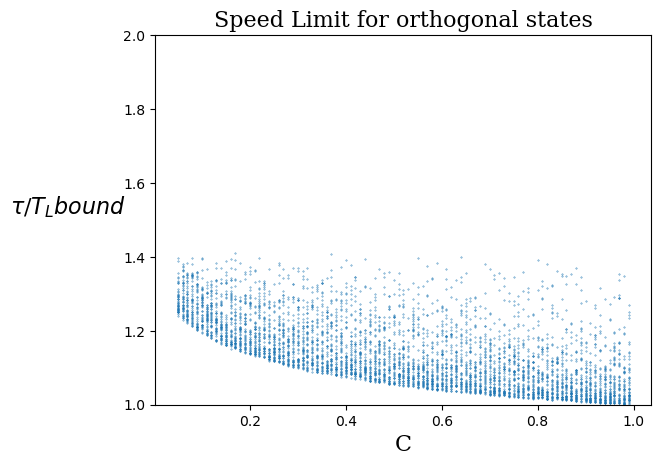

In [17]:
x  = np.loadtxt('res_orthogonal.txt')
plt.scatter(x.T[0], x.T[1], s = .1)
plt.xlabel('C', fontdict = font)
plt.ylim([1,2])
plt.ylabel('$\\tau$/${T_Lbound}$', fontdict = font,rotation=0,labelpad=40)
plt.title('Speed Limit for orthogonal states', fontdict = font)
plt.show()

In [3]:
rng = np.arange(0.05,1,0.01)
len(rng)
shots = 500
res_orthogonal2 = np.zeros((len(rng)*shots,2))
for i in range(len(rng)):

    for j in range(shots):

        print(rng[i])
        #print(rng[i])
        a = np.round(rng[i],2)
        res_orthogonal2[(i*shots)+j][0] = a
        res_orthogonal2[(i*shots)+j][1] = orthogonal_lower_bound_master(a)

#res_orthogonal

0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05


0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.060000000000000005
0.06000000000

0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002


0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.08000000000000002
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001


0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001
0.09000000000000001


0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001
0.11000000000000001


0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001


0.12000000000000001
0.12000000000000001
0.12000000000000001
0.12000000000000001
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13


0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002


0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003


0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.16000000000000003
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004


0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004
0.17000000000000004


0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005


0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000

0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002
0.21000000000000002


0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003
0.22000000000000003


0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004
0.23000000000000004


0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.24000000000000005


0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006


0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006
0.25000000000000006


0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006
0.26000000000000006


0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004


0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004


0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004


0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005


0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006


0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.33


0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003
0.35000000000000003


0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004
0.36000000000000004


0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005


0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.37000000000000005
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006


0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006
0.38000000000000006


0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007
0.39000000000000007


0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000000001
0.4000000000

0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000000001
0.4100000000

0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004


0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.42000000000000004
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005


0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005
0.43000000000000005


0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006
0.44000000000000006


0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007
0.45000000000000007


0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000000001
0.4600000000

0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000

0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4700000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000

0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000000001
0.4800000000

0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005
0.49000000000000005


0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000

0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000000001
0.5100000000

0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000000001
0.5200000000

0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000000001
0.5300000000

0.5300000000000001
0.5300000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000

0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000000001
0.5400000000

0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000000002
0.5500000000

0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000000002
0.5600000000

0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000000002
0.5700000000

0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000000002
0.5800000000

0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000000002
0.5900000000

0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000

0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6000000000000002
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000

0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000000001
0.6100000000

0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000000001
0.6200000000

0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000000001
0.6300000000

0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000

0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000000001
0.6500000000

0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000

0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6600000000000001
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000

0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000000002
0.6700000000

0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000000002
0.6800000000

0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000000002
0.6900000000

0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000

0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000000002
0.7100000000

0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000000002
0.7200000000

0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000

0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7300000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000

0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000000002
0.7400000000

0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000000002
0.7500000000

0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000000002
0.7600000000

0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000000002
0.7700000000

0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000000001
0.7800000000

0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000

0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.7900000000000001
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000

0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000000002
0.8000000000

0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000000002
0.8100000000

0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000000002
0.8200000000

0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000000002
0.8300000000

0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000000002
0.8400000000

0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000000002
0.8500000000

0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000

0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8600000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000

0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000000002
0.8700000000

0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000000002
0.8800000000

0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000000002
0.8900000000

0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000000002
0.9000000000

0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000000003
0.9100000000

0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000

0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9200000000000003
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000

0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000000002
0.9300000000

0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000000002
0.9400000000

0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000000002
0.9500000000

0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000000002
0.9600000000

0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000000002
0.9700000000

0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000000002
0.9800000000

0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000

0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002
0.9900000000000002


In [ ]:
res_orthogonal

In [5]:
res_orthogonal1  = np.loadtxt('res_orthogonal1.txt')

xx = np.concatenate((res_orthogonal1,res_orthogonal2))
#res_orthogonal
#res_orthogonal1
len(xx)

47520

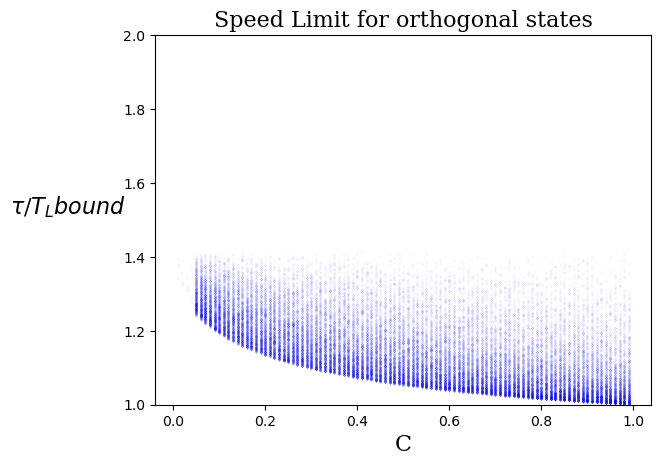

In [13]:
#x  = np.loadtxt('res_orthogonal.txt')
x = xx
plt.scatter(x.T[0], x.T[1], s = .001,color='blue')
plt.xlabel('C', fontdict = font)
plt.ylim([1,2])
plt.ylabel('$\\tau$/${T_Lbound}$', fontdict = font,rotation=0,labelpad=40)
#plt.axhline(y=np.sqrt(2),color='black')
plt.title('Speed Limit for orthogonal states', fontdict = font)
plt.show()

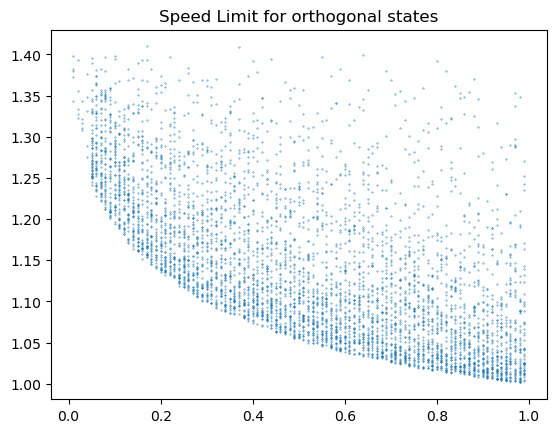

In [34]:
plt.scatter(xx.T[0], xx.T[1], s = .1)
plt.title('Speed Limit for orthogonal states')
plt.show()

In [23]:
def part_b_lower_bound_master(conc,lbound,ubound):
    x = random_statevector2_given_fidelity(4,lbound,ubound,conc)
    return lower_bound_1(x),lower_bound_2(x)

part_b_lower_bound_master(.22,.35,.4)

(1.967692174387737, 1.8281501943937641)

In [29]:
with open('res_arb.txt', 'w') as fw:
    np.savetxt(fw,res_arb)

In [24]:
rng = np.arange(0.22,.8,0.01)
len(rng)
lbound = 0.35
ubound = .4
shots = 50
res_arb = np.zeros((len(rng)*shots,3))
for i in range(len(rng)):

    for j in range(shots):

        if j == shots -1:
            print(rng[i])
        a = np.round(rng[i],2)
        res_arb[(i*shots)+j][0] = a
        b = part_b_lower_bound_master(a,lbound,ubound)
        res_arb[(i*shots)+j][1] = b[0]
        res_arb[(i*shots)+j][2] = b[1]

0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.30000000000000004
0.31000000000000005
0.32000000000000006
0.33000000000000007
0.3400000000000001
0.3500000000000001
0.3600000000000001
0.3700000000000001
0.3800000000000001
0.3900000000000001
0.40000000000000013
0.41000000000000014
0.42000000000000015
0.43000000000000016
0.44000000000000017
0.4500000000000002
0.4600000000000002
0.4700000000000002
0.4800000000000002
0.4900000000000002
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.6000000000000003
0.6100000000000003
0.6200000000000003
0.6300000000000003
0.6400000000000003
0.6500000000000004
0.6600000000000004
0.6700000000000004
0.6800000000000004
0.6900000000000004
0.7000000000000004
0.7100000000000004
0.7200000000000004
0.7300000000000004
0.7400000000000004
0.7500000000000004
0.7600000000000005
0.7700000000000005
0.7800000

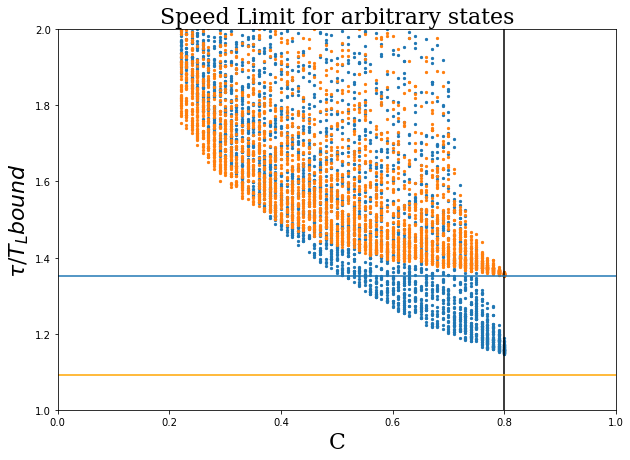

In [28]:
plt.figure(figsize = (10.0,7.0))
plt.scatter(res_arb.T[0], res_arb.T[1], s = 5)
plt.scatter(res_arb.T[0], res_arb.T[2], s = 5)
plt.xlim(0,1)
plt.ylim(1,2)
#plt.plot([1.091,1.091])
#plt.plot([1.351,1.351])
#plt.plot([1,2],(0.8,.8))
plt.axvline(x=0.8,color = 'black')
plt.axhline(y=1.351)
plt.axhline(y=1.091,color='orange')
#plt.annotate('P1', xy=(.8,1.351), textcoords='data') 

plt.xlabel('C', fontdict = font)
plt.ylabel('$\\tau$/${T_Lbound}$', fontdict = font)
plt.title('Speed Limit for arbitrary states', fontdict = font)
plt.show()